In [62]:
!pip install tensorflow

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [64]:
# Generate Synthetic Data
X, y = make_moons(n_samples=1000, noise=0.08, random_state=42)
y = y.reshape(-1, 1)  # reshape for consistancy

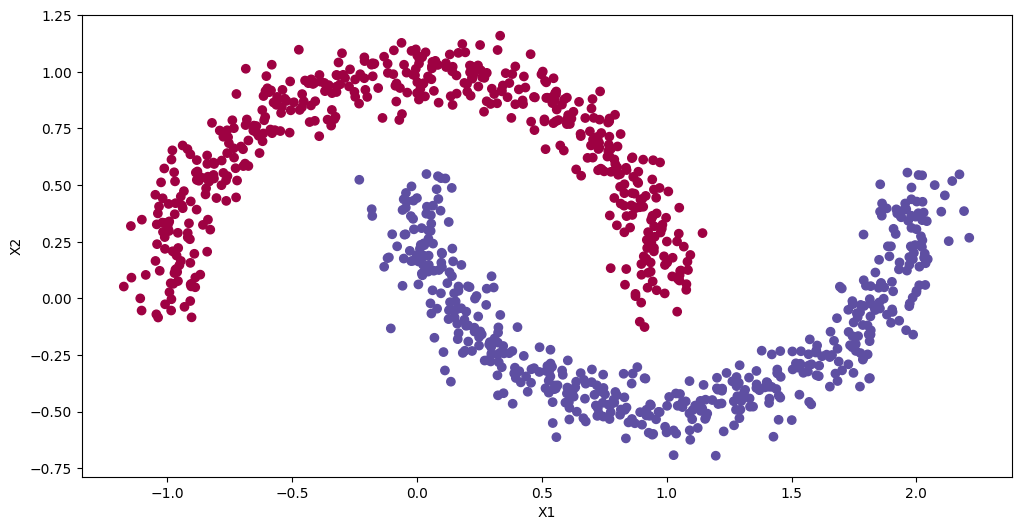

In [65]:
plt.figure(figsize= (12,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [66]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Build a sequential model with linear activation

def build_linear_model():
  model = Sequential([
  Dense(4, activation= 'linear', input_dim=2), # First layer with linear activation
  Dense(1, activation= 'sigmoid')#output layer for binary classification
  ])
  model.compile(optimizer=Adam(learning_rate=0.02), loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [68]:
# Build a sequential model with ReLU activation

def build_relu_model():
  model = Sequential([
      Dense(8, activation= 'relu', input_dim = 2), # First layer with ReLU activation, increased neurons
      Dense(1, activation = 'sigmoid') # output layer for binary classification
  ])
  model.compile(optimizer = Adam(learning_rate= 0.1), loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [69]:
# Train and evaluate the models
def train_and_evaluate(model, X_train, y_train, X_test, y_test, epochs = 100, batch_size = 16):
  history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose = 0)
  y_pred = model.predict(X_test)
  y_pred = (y_pred > 0.5).astype(int)
  accuracy = accuracy_score(y_test, y_pred)
  confusion = confusion_matrix(y_test, y_pred)
  return accuracy, confusion, history.history['accuracy'][-1], y_pred

In [70]:
#Initialize Models
linear_model = build_linear_model()
relu_model = build_relu_model()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
#Train and evaluate linear model
print('Training Linear Model...')
linear_accuracy, linear_confusion, linear_accuracy_final, linear_y_pred = train_and_evaluate(linear_model, X_train, y_train, X_test, y_test)
print(f'Accuracy with linear activation: {linear_accuracy}')
print(f'Confusion Matrix with linear activation: \n{linear_confusion}')
print(f'Final Accuracy with linear activation: {linear_accuracy_final}')

Training Linear Model...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Accuracy with linear activation: 0.895
Confusion Matrix with linear activation: 
[[87 13]
 [ 8 92]]
Final Accuracy with linear activation: 0.8799999952316284


In [72]:
#Train and evaluate Relu model
print('Training Relu Model...')
relu_accuracy, relu_confusion, relu_accuracy_final, relu_y_pred = train_and_evaluate(relu_model, X_train, y_train, X_test, y_test)
print(f'Accuracy with ReLU activation: {relu_accuracy}')
print(f'Confusion Matrix with ReLU activation: \n{relu_confusion}')
print(f'Final Accuracy with ReLU activation: {relu_accuracy_final}')

Training Relu Model...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Accuracy with ReLU activation: 1.0
Confusion Matrix with ReLU activation: 
[[100   0]
 [  0 100]]
Final Accuracy with ReLU activation: 1.0


In [73]:
# Visualize decision boundry
def plot_decision_bounday(model, X, y, title):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                       np.linspace(y_min, y_max, 200))
  grid = np.c_[xx.ravel(), yy.ravel()]
  pred = model.predict(grid)
  pred = (pred > 0.5).astype(int).reshape(xx.shape)
  plt.contourf(xx, yy, pred, cmap=plt.cm.Spectral, alpha = 0.8)
  plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap=plt.cm.Spectral, edgecolors='black')
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.title('Decision Boundary for ' + title)
  plt.show()


 Visualizing Decision Boundaries...
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 930us/step


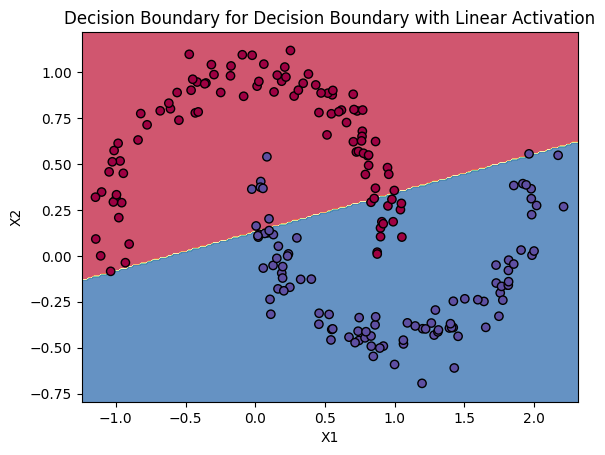

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step


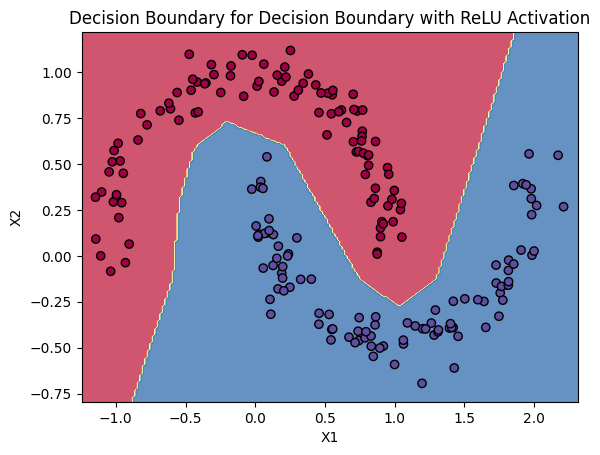

In [74]:
#plot decision boundaries
print('\n Visualizing Decision Boundaries...')
plot_decision_bounday(linear_model, X_test, y_test, 'Decision Boundary with Linear Activation')
plot_decision_bounday(relu_model, X_test, y_test, 'Decision Boundary with ReLU Activation')
